In [ ]:
!pip install opendatasets

In [ ]:
!pip install pandas

In [ ]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 51.0 MB/s eta 0:00:00


In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/ahmedmoorsy/facial-expression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maharajmahaadev2
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ahmedmoorsy/facial-expression


100%|██████████| 193M/193M [00:11<00:00, 18.3MB/s]


In [ ]:
!pip install keras.preprocessing.image

ERROR: Could not find a version that satisfies the requirement keras.preprocessing.image (from versions: none)
ERROR: No matching distribution found for keras.preprocessing.image


In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys


In [ ]:
filname = '/content/facial-expression/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('/content/facial-expression/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [ ]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [ ]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [ ]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers import BatchNormalization
#from ann.visualizer.visualize import ann_viz
from sklearn import tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
#from dtreeviz.trees import *

In [ ]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()

    return model
model=my_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 7)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 2,787,015 (10.63 MB)

 Trainable params: 2,785,863 (10.63 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
path_model='/content/model_filter.keras' # save model at this location after each epoch
#tf.keras.backend.tensorflow_backend.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
#tf.keras.backend.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=X_train,
            y=y_train,
            batch_size=64,
            epochs=10,
            verbose=1,
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Epoch 1/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 49s 71ms/step - accuracy: 0.2991 - loss: 1.8016 - val_accuracy: 0.3934 - val_loss: 1.5698
Epoch 2/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 63s 50ms/step - accuracy: 0.4845 - loss: 1.3499 - val_accuracy: 0.5230 - val_loss: 1.2457
Epoch 3/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.5745 - loss: 1.1317 - val_accuracy: 0.5300 - val_loss: 1.2716
Epoch 4/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.6318 - loss: 0.9877 - val_accuracy: 0.5506 - val_loss: 1.1773
Epoch 5/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6900 - loss: 0.8410 - val_accuracy: 0.5807 - val_loss: 1.1082
Epoch 6/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.7508 - loss: 0.6950 - val_accuracy: 0.5807 - val_loss: 1.1852
Epoch 7/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.8136 - loss: 0.5317 - val_accuracy: 0.5918 - val_loss: 1.2659
Epoch 8/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.8781 - loss: 0.3626 - 

In [ ]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [ ]:

def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('Emotion based classifaction')

plt.show()

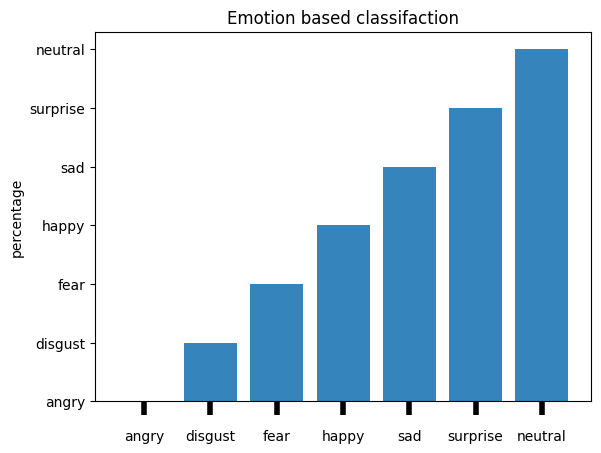

In [ ]:
emotion_analysis(objects)

In [ ]:
import seaborn as sns
sns.heatmap(X_test, y_test, annot=True)

TypeError: heatmap() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [ ]:

y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


(3589, 7)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

NotAllowedError: Permission denied


In [ ]:
from skimage import io
img = tf.keras.utils.load_img('/content/photo.jpg', grayscale=True, target_size=(48, 48))
show_img=tf.keras.utils.load_img('/content/photo.jpg', grayscale=False, target_size=(200, 200))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',objects[ind])


TypeError: load_img() got an unexpected keyword argument 'grayscale'

In [ ]:
def summarize_diagnostics(history):
	# plot loss
  fig = plt.figure()
  fig.set_figheight(10)
  fig.set_figwidth(10)
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='red', label='train')
  plt.plot(history.history['val_loss'], color='black', label='test')
  plt.xlabel('Epoch')
  plt.legend()
	# plot accuracy
  #plt.subplot(212)
  fig = plt.figure()
  fig.set_figheight(5)
  fig.set_figwidth(10)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='red', label='train')
  plt.plot(history.history['val_accuracy'], color='black', label='test')
  plt.xlabel('Epoch')
	# save plot to file
  plt.legend()
  plt.show()
  filename = sys.argv[0].split('/')[-1]
  plt.savefig(filename + '_plot.png')
  plt.close()

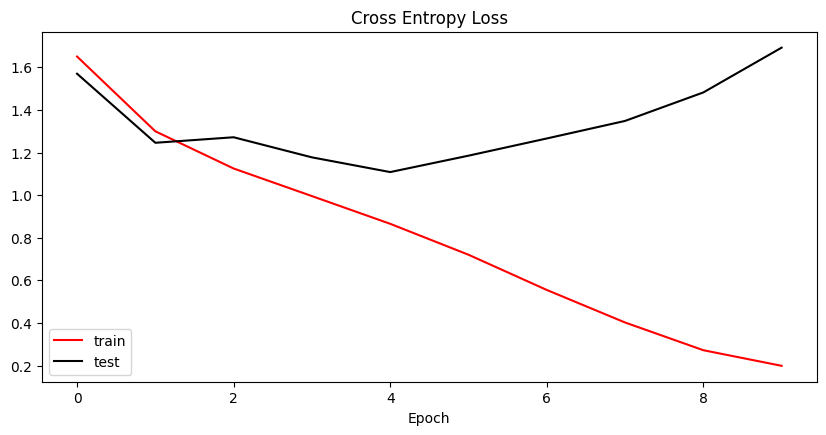

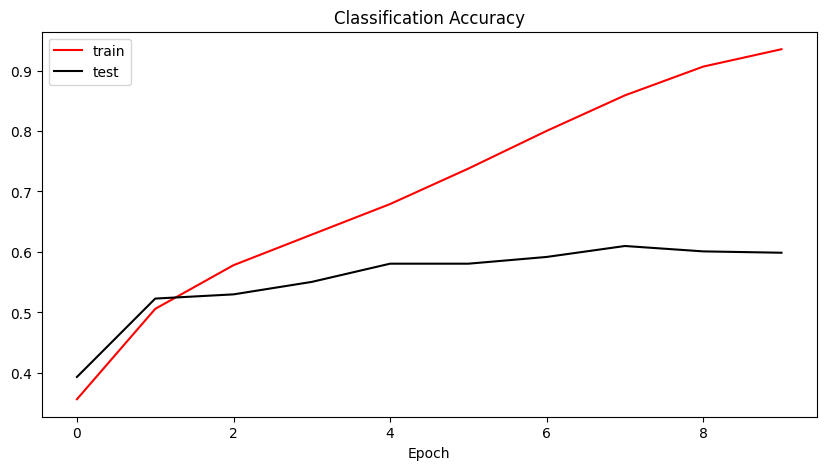

In [ ]:
summarize_diagnostics(h)

In [ ]:
from tensorflow.keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ModuleNotFoundError: No module named 'tensorflow.keras.utils.vis_utils'

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


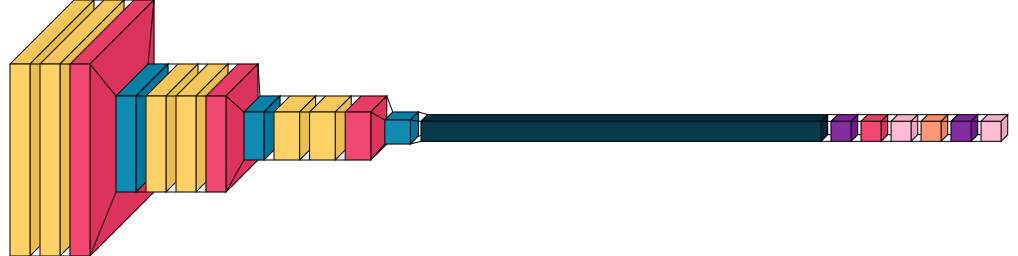

In [ ]:
import visualkeras
visualkeras.layered_view(model)

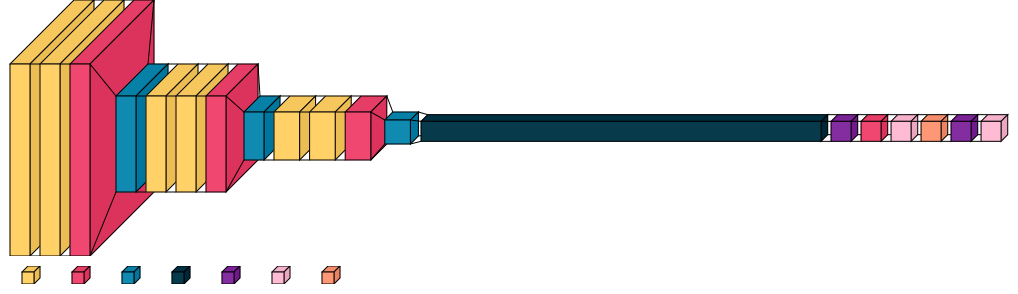

In [ ]:
  visualkeras.layered_view(model, legend=True) # without custom font
  from PIL import ImageFont
  #font = ImageFont.truetype("arial.ttf", 12)
  visualkeras.layered_view(model, legend=True) # selected font

In [ ]:
model.save("model.h5")

In [ ]:
from keras.models import load_model
cheesuh = load_model('model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


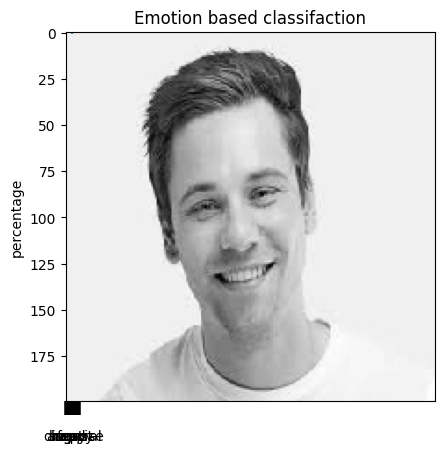

Expression Prediction: happy


In [ ]:
from skimage import io
img = tf.keras.utils.load_img('images.jpg', color_mode="grayscale", target_size=(48, 48))
show_img=tf.keras.utils.load_img('images.jpg', color_mode="grayscale", target_size=(200, 200))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = cheesuh.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',objects[ind])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


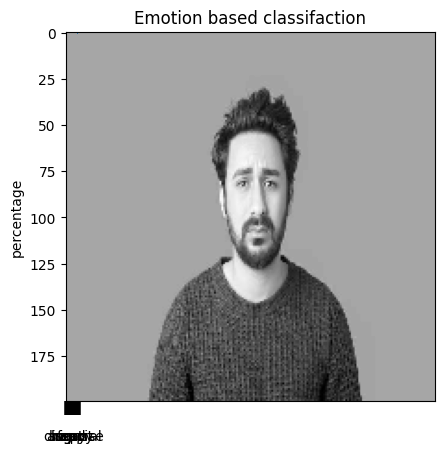

Expression Prediction: neutral


In [ ]:
from skimage import io
img = tf.keras.utils.load_img('images-3.jpg', color_mode="grayscale", target_size=(48, 48))
show_img=tf.keras.utils.load_img('images-3.jpg', color_mode="grayscale", target_size=(200, 200))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = cheesuh.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',objects[ind])